# **Modelling and Evaluation**

## Objectives

### Answer **business requirement 2**:
- The client is interested in predicting whether a cherry leaf is healthy or contains powdery mildew. 

## Inputs

* inputs/cherryleaves_dataset/cherry-leaves/train
* inputs/cherryleaves_dataset/cherry-leaves/validation
* inputs/cherryleaves_dataset/cherry-leaves/test
* image shape embeddings

## Outputs

* Images distribution plot in train, validation and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine Learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file. 
* Prediction on random image file.


---

## Import Packages 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---
##  Set Working directory

In [2]:
current_dir = os.getcwd()
current_dir 

'/workspaces/mildew-detection-cherry-leaves-p5/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspaces/mildew-detection-cherry-leaves-p5'

### Set Input Directories
Set train, validation, and test paths

In [5]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set Output Directory 

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path) 

Old version is already available create a new version.


### Set Labels 

In [7]:
labels = os.listdir(train_path)
print(f'Image labels are: {labels}')  

Image labels are: ['powdery_mildew', 'healthy']


In [8]:
## Imports saved image shape embedding 

import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape 

(256, 256, 3)

---
## Number of Images in Train, Test, and Validation Datasets


* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




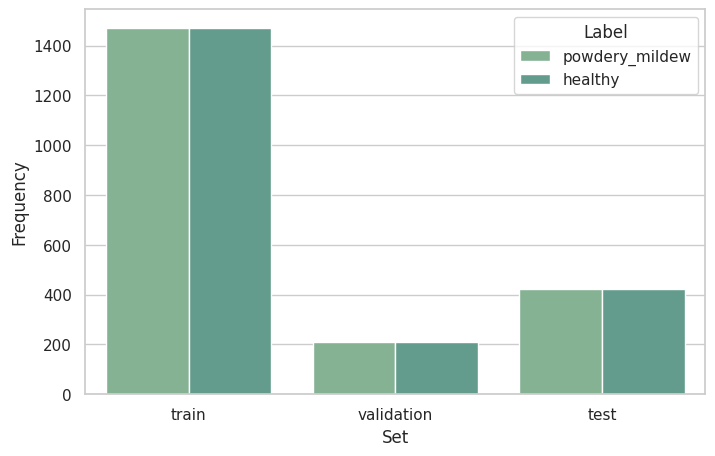

In [35]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_theme(style="whitegrid", palette="crest") 
# sns.set_style("whitegrid") 
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')   
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show() 

<Figure size 800x500 with 0 Axes>

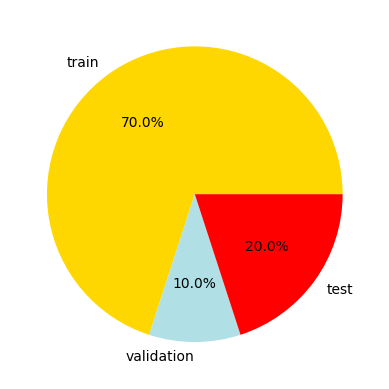

In [15]:
plt.figure(figsize=(8,5))
labels = 'train', 'validation', 'test'
sizes = [70, 10, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['gold', 'powderblue', 'red']) 
plt.savefig(f'{file_path}/labels_pie.png', bbox_inches='tight', dpi=150) 

---
# Image Data Augmentation
---

## ImageDataGenerator used: 

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Initialise** ImageDataGenerator:


In [37]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          ) 

### Augment training image dataset:

In [38]:
# Set batch size first 
batch_size = 20 
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices 

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment validation image dataset:

In [39]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices 

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment test image dataset:

In [40]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices 

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### **Plot Augmented Training Image**

(20, 256, 256, 3)


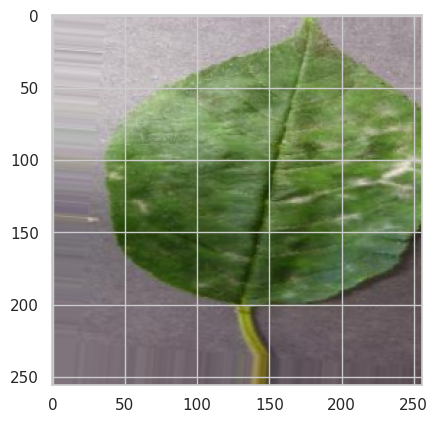

(20, 256, 256, 3)


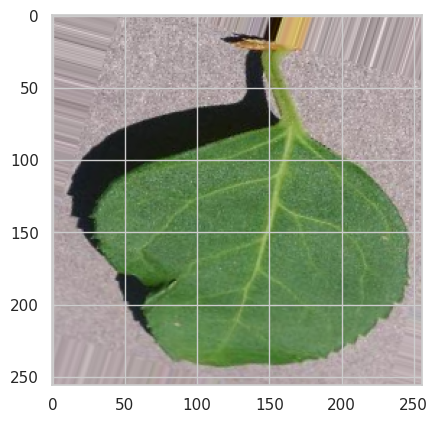

(20, 256, 256, 3)


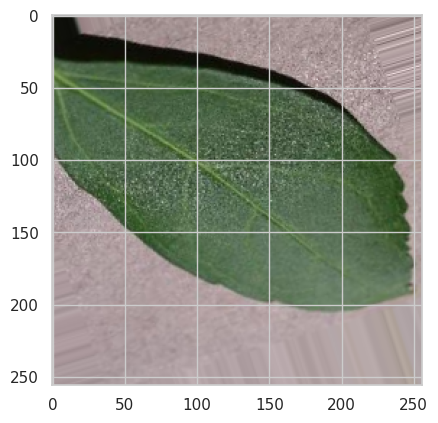

In [41]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()  

### **Plot Augmented Validation and Test Images**

(20, 256, 256, 3)


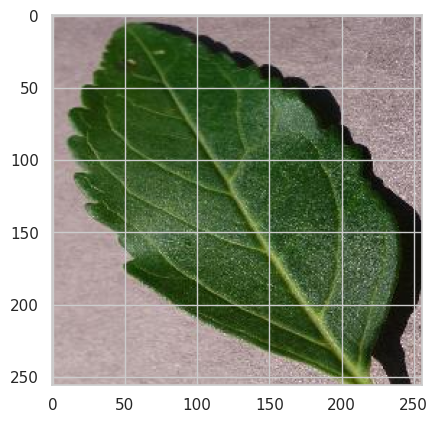

(20, 256, 256, 3)


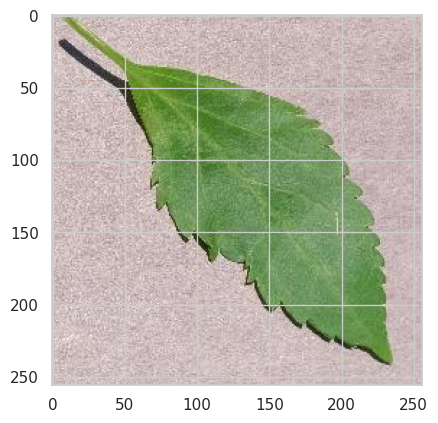

(20, 256, 256, 3)


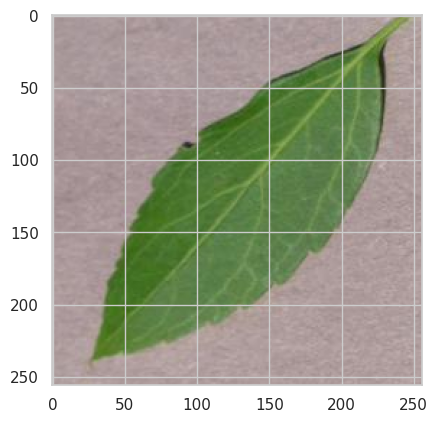

In [42]:

for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show() 

(20, 256, 256, 3)


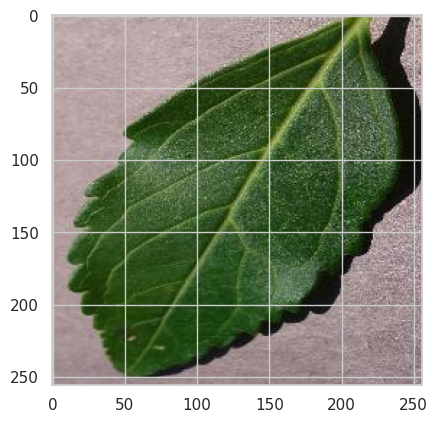

(20, 256, 256, 3)


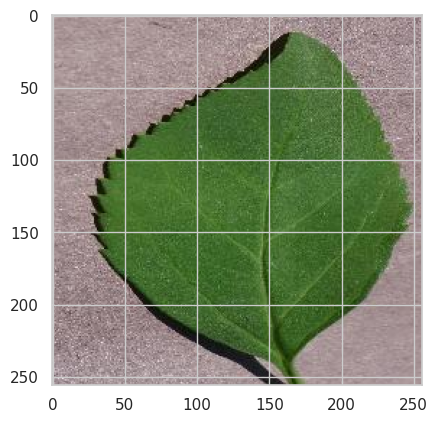

(20, 256, 256, 3)


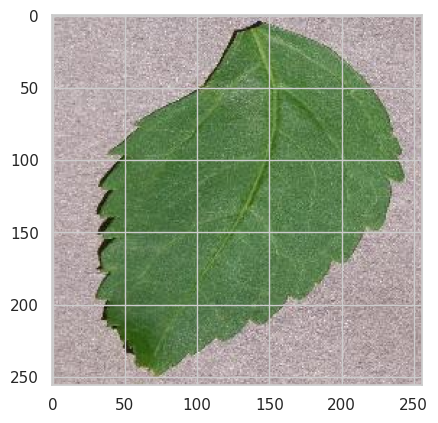

In [43]:

for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

### Save class indices:

In [44]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl") 

['outputs/v1/class_indices.pkl']

---
# Model Creation
----

## ML Model

### Import Model Packages:

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

## Model

In [54]:
def image_tf_model():
    """
    Creates a binary classification tensorflow model
    Includes different layers and number of layers, filters,  
    activation functions and optimiser 
    """

    
    model = Sequential()
## Input 
    model.add(Conv2D(filters=8, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=8, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=4, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten()) 
    model.add(Dense(128, activation='relu'))
## Output 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

### Model Summary 

In [55]:
image_tf_model().summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 8)       584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 4)         292       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3600)             

### Early Stopping
* Calls upon the keras module EarlyStopping:

In [57]:
early_stop = EarlyStopping(monitor='val_loss',patience=3) 

## Fit the Model for Training
* Using the .fit() method 

In [58]:
model = image_tf_model() 
model.fit(train_set,
          epochs=20, 
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data = validation_set,
          callbacks=[early_stop],
          verbose=1) 

Epoch 1/20
147/147 [==============================] - 83s 558ms/step - loss: 0.3301 - accuracy: 0.8574 - val_loss: 0.0589 - val_accuracy: 0.9810
Epoch 2/20
147/147 [==============================] - 83s 564ms/step - loss: 0.1018 - accuracy: 0.9767 - val_loss: 0.0263 - val_accuracy: 0.9881
Epoch 3/20
147/147 [==============================] - 82s 559ms/step - loss: 0.0909 - accuracy: 0.9744 - val_loss: 0.0401 - val_accuracy: 0.9881
Epoch 4/20
147/147 [==============================] - 81s 551ms/step - loss: 0.0624 - accuracy: 0.9822 - val_loss: 0.0169 - val_accuracy: 0.9952
Epoch 5/20
147/147 [==============================] - 82s 558ms/step - loss: 0.0864 - accuracy: 0.9706 - val_loss: 0.0170 - val_accuracy: 0.9952
Epoch 6/20
147/147 [==============================] - 83s 564ms/step - loss: 0.0427 - accuracy: 0.9880 - val_loss: 0.0094 - val_accuracy: 0.9976
Epoch 7/20
147/147 [==============================] - 82s 559ms/step - loss: 0.0492 - accuracy: 0.9863 - val_loss: 0.0087 - val_ac

### Save Model:

In [60]:
model.save('outputs/v1/mildew_detector_model.h5') 

---
# Model Performance
---

## Model Learning Curve


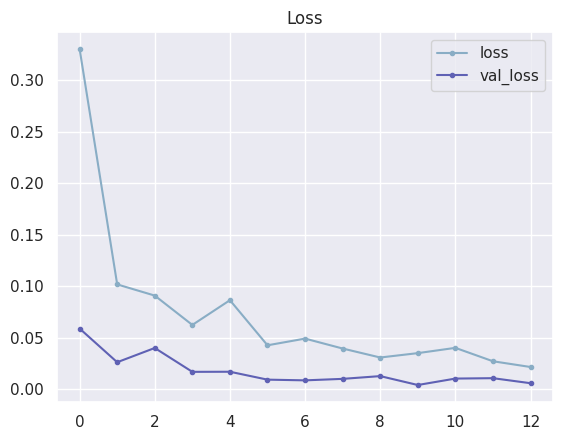

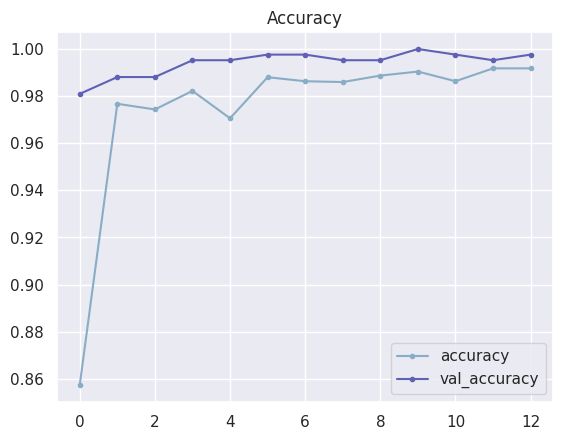

In [67]:
losses = pd.DataFrame(model.history.history)
 
sns.set_theme(style="darkgrid", palette="twilight") 
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n") 
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Load saved model:

In [68]:

from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

### Evaluate model on test set:

In [69]:
evaluation = model.evaluate(test_set) 

43/43 [==============================] - 6s 136ms/step - loss: 0.0204 - accuracy: 0.9917


### Save evaluation pickle:

In [70]:
joblib.dump(value=evaluation, filename=f"outputs/v1/evaluation.pkl") 


['outputs/v1/evaluation.pkl']

## Predict On New Image Data 

Load random image as PIL:

Image shape: (256, 256), Image mode: RGB


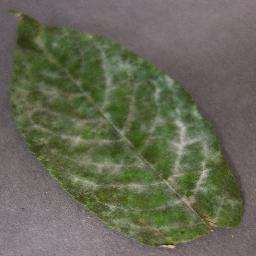

In [71]:
from tensorflow.keras.preprocessing import image

pointer = 66 
label = labels[0] # select healthy or Powdery Mildew

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}') 
pil_image

Convert image to an array to make a prediction:

In [72]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape) 

(1, 256, 256, 3)


Predict class probabilities:

In [73]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5] 

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)


0.9999956
powdery_mildew


# Push files to Repository 

## Pushing generated/new files to GitHub repository


* Add, commit, push files to GitHub. 

---
## Conlcusions and Next Steps
* The Model has now been created a trained, and can predict on new/live data.
* The dashboard will now be created utilising the model and files created in the notebooks. 